In [69]:
import numpy as np
import pandas as pan
import matplotlib.pyplot as plot
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from bioinfokit.visuz import cluster

In [70]:
df = pan.read_csv('Hitters.csv')
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [71]:
# Check for null values
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [72]:
# Drop any rows the contain missing values
# Drop Salary
df = df.dropna(axis=0)
# Check again for null values
df.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [73]:
# Get dummy variables
dummies = pan.get_dummies(df[['League', 'Division', 'NewLeague']])
# Extract independent variable
y = df['Salary']
# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X = df.drop(['Salary', 'NewLeague', 'League', 'Division'], axis=1)
# Define the feature set X.
X = pan.concat([X, dummies], axis=1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CWalks,PutOuts,Assists,Errors,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,...,375,632,43,10,0,1,0,1,0,1
2,479,130,18,66,72,76,3,1624,457,63,...,263,880,82,14,1,0,0,1,1,0
3,496,141,20,65,78,37,11,5628,1575,225,...,354,200,11,3,0,1,1,0,0,1
4,321,87,10,39,42,30,2,396,101,12,...,33,805,40,4,0,1,1,0,0,1
5,594,169,4,74,51,35,11,4408,1133,19,...,194,282,421,25,1,0,0,1,1,0


In [74]:
# It is neccessary to standardize the variables because PCA works under the assumption that the data is normally distributed
#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(X))
X_reduced.shape

(263, 22)

In [75]:
#define cross validation method
cv = KFold(n_splits=5)
regr = LinearRegression()
mse = []

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 19):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)

Text(0.5, 1.0, 'hp')

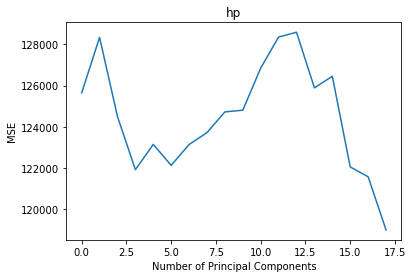

In [76]:
# Plot cross-validation results    
plot.plot(mse)
plot.xlabel('Number of Principal Components')
plot.ylabel('MSE')
plot.title('hp')

In [77]:
# The validation approach showed that the recommended number of PCs is 5.

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=0) 

#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))

#train PCR model on training data 
reg = LinearRegression()

mse = []
for i in np.arange(1, 19):
    reg.fit(X_reduced_train[:,:i], y_train)
    pred = reg.predict(X_reduced_test[:,:i])
    mse.append(mean_squared_error(y_test, pred))
    
mse

[141077.27285419087,
 140449.27505383457,
 133349.937077812,
 126128.33706059022,
 126488.38711685778,
 125252.67006139304,
 124577.12700389382,
 123968.88239108774,
 124767.8395696437,
 124306.72195727994,
 120994.41413426958,
 130800.70420196859,
 135470.69061403692,
 135231.74734982837,
 131678.39513371768,
 122746.60240099768,
 115996.616810401,
 114961.53484492692]

Text(0.5, 1.0, 'hp')

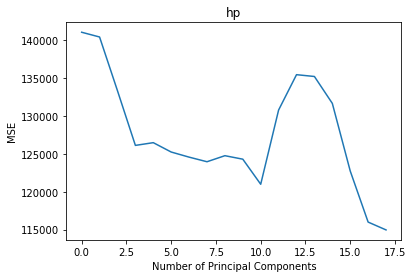

In [78]:
# Plot cross-validation results    
plot.plot(mse)
plot.xlabel('Number of Principal Components')
plot.ylabel('MSE')
plot.title('hp')

In [85]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CWalks,PutOuts,Assists,Errors,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,...,375,632,43,10,0,1,0,1,0,1
2,479,130,18,66,72,76,3,1624,457,63,...,263,880,82,14,1,0,0,1,1,0
3,496,141,20,65,78,37,11,5628,1575,225,...,354,200,11,3,0,1,1,0,0,1
4,321,87,10,39,42,30,2,396,101,12,...,33,805,40,4,0,1,1,0,0,1
5,594,169,4,74,51,35,11,4408,1133,19,...,194,282,421,25,1,0,0,1,1,0


In [84]:
X_st =  StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
PC_scores = pan.DataFrame(pca.fit_transform(X_st),
               columns = ['PC 1', 'PC 2'])
PC_scores.head(22)

,PC 1,PC 2
0,-0.282823,2.650655
1,0.582642,-2.791535
2,3.263233,1.801441
3,-2.703012,0.481545
4,1.166912,-1.852599
5,-3.956350,0.998467
6,-3.286249,-0.508572
7,-3.651718,0.883186
8,4.064660,1.023150
9,3.384695,-2.550786


In [80]:
PC1 = pca.fit_transform(X_st)[:,0]
PC2 = pca.fit_transform(X_st)[:,1]
ldngs = pca.components_
scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
features = X.columns.values.tolist()

<Figure size 432x288 with 0 Axes>

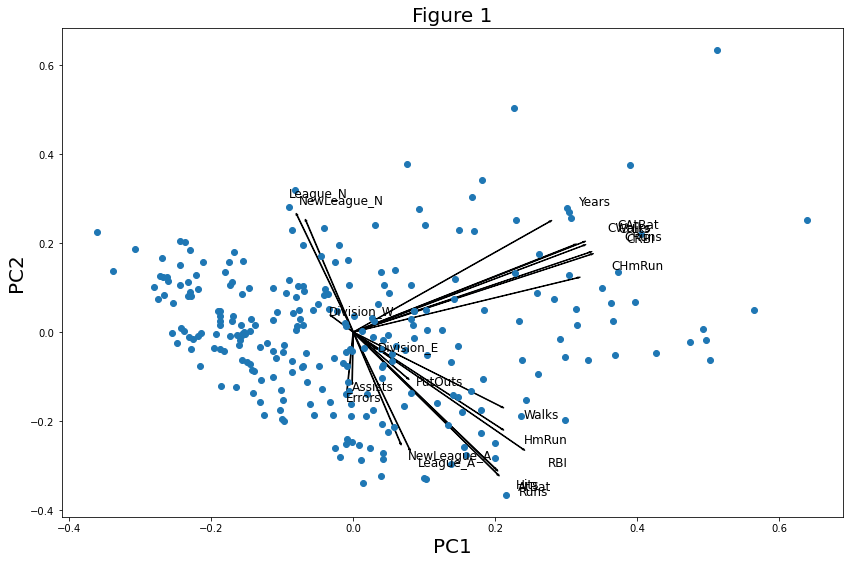

<Figure size 432x288 with 0 Axes>

In [89]:
fig, ax = plot.subplots(figsize=(14, 9))
 
for i, feature in enumerate(features):
    ax.arrow(0, 0, ldngs[0, i], 
             ldngs[1, i])
    ax.text(ldngs[0, i] * 1.15, 
            ldngs[1, i] * 1.15, 
            feature, fontsize=12)
 
ax.scatter(PC1 * scalePC1,PC2 * scalePC2)
 
ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_title('Figure 1', fontsize=20)
plot.figure()

In [90]:
# From the table and biplot, we can see that Hits, HmRun, RBI, CHits, CHmRun, Assists, 
# NewLeague_A and NewLeague_N are closely correlated to PC1
# We can also see that AtBat, HmRun, Runs, Walks, CAtBat, CHits, CRBI, 
# CWalks, PutOuts, Assists, Errors, League_A, League_N, and Division_W are closely correlated to PC2